In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import gradio as gr

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

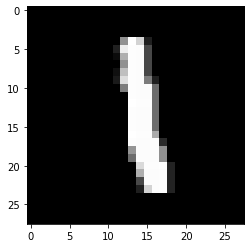

In [3]:
plt.imshow(x_train[6], cmap="gray")
plt.show()

In [4]:
x_train = tf.keras.utils.normalize(x_train, axis=1)

In [5]:
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [7]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [16]:
model.fit(x=x_train, y=y_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0142 - accuracy: 0.9953
Epoch 2/100
1875/1875 [==============================] - 2s 928us/step - loss: 0.0130 - accuracy: 0.9954
Epoch 3/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0121 - accuracy: 0.9957
Epoch 4/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0110 - accuracy: 0.9962
Epoch 5/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0095 - accuracy: 0.9966
Epoch 6/100
1875/1875 [==============================] - 2s 887us/step - loss: 0.0089 - accuracy: 0.9969
Epoch 7/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0088 - accuracy: 0.9970
Epoch 8/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0094 - accuracy: 0.9969
Epoch 9/100
1875/1875 [==============================] - 2s 899us/step - loss: 0.0086 - accuracy: 0.9971
Epoch 10/100
1875/1875 [==============================] - 2s 1ms/st

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0016 - accuracy: 0.9995
Epoch 80/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0053 - accuracy: 0.9990
Epoch 81/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0029 - accuracy: 0.9993
Epoch 82/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0037 - accuracy: 0.9991
Epoch 83/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0056 - accuracy: 0.9988
Epoch 84/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0038 - accuracy: 0.9992
Epoch 85/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0029 - accuracy: 0.9993
Epoch 86/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0028 - accuracy: 0.9995
Epoch 87/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0055 - accuracy: 0.9988
Epoch 88/100
1875/1875 [==============================] - 2s 1ms/step - loss:

In [17]:
test_loss, test_acc = model.evaluate(x=x_test, y=y_test)

313/313 [==============================] - 0s 908us/step - loss: 0.3303 - accuracy: 0.9791


In [18]:
print(test_acc)

0.9790999889373779


In [19]:
predictions = model.predict([x_test])

In [20]:
print(np.argmax(predictions[120]))

5


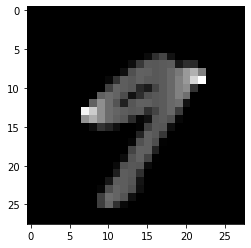

In [21]:
plt.imshow(x_test[20], cmap="gray")
plt.show()

In [22]:
def classify(image):
    prediction = model.predict(image).tolist()[0]
    return {str(i): prediction[i] for i in range(10)}
sketchpad = gr.inputs.Sketchpad()
label = gr.outputs.Label(num_top_classes=3)
interface = gr.Interface(classify, sketchpad, label, live=True, capture_session=True)

In [23]:
interface.launch()

Running locally at: http://127.0.0.1:7861/
To get a public link for a hosted model, set Share=True
Interface loading below...


(<Flask 'gradio.networking'>, 'http://127.0.0.1:7861/', None)